In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [18]:
from tensorflow.examples.tutorials.mnist import input_data

In [19]:
mnist = input_data.read_data_sets("MNIst_data/", one_hot=True)

Extracting MNIst_data/train-images-idx3-ubyte.gz
Extracting MNIst_data/train-labels-idx1-ubyte.gz
Extracting MNIst_data/t10k-images-idx3-ubyte.gz
Extracting MNIst_data/t10k-labels-idx1-ubyte.gz


In [26]:
nb_classes = 10

In [27]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [28]:
W1 = tf.Variable(tf.random_normal([784, 100]), name='weight1')
b1 = tf.Variable(tf.random_normal([100]), name='bias1')
layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([100, nb_classes]), name='weight2')
b2 = tf.Variable(tf.random_normal([nb_classes]), name='bias2')
layer_last = tf.nn.softmax(tf.matmul(layer1, W2) + b2)

hypothesis = layer_last
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [29]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [40]:
training_epochs = 50
batch_size = 100

Epoch: 0001 cost= 2.641283578
Epoch: 0002 cost= 2.388554317
Epoch: 0003 cost= 2.256166012
Epoch: 0004 cost= 2.178746914
Epoch: 0005 cost= 2.125247914
Epoch: 0006 cost= 2.082352796
Epoch: 0007 cost= 2.044416897
Epoch: 0008 cost= 2.007999174
Epoch: 0009 cost= 1.971890018
Epoch: 0010 cost= 1.935983972
Epoch: 0011 cost= 1.900113293
Epoch: 0012 cost= 1.864636122
Epoch: 0013 cost= 1.829998494
Epoch: 0014 cost= 1.796474642
Epoch: 0015 cost= 1.764344712
Epoch: 0016 cost= 1.733716650
Epoch: 0017 cost= 1.704673402
Epoch: 0018 cost= 1.677361325
Epoch: 0019 cost= 1.651999082
Epoch: 0020 cost= 1.628354360
Epoch: 0021 cost= 1.606128096
Epoch: 0022 cost= 1.585053574
Epoch: 0023 cost= 1.564956859
Epoch: 0024 cost= 1.545629793
Epoch: 0025 cost= 1.526972954
Epoch: 0026 cost= 1.508865687
Epoch: 0027 cost= 1.491385156
Epoch: 0028 cost= 1.474461845
Epoch: 0029 cost= 1.458050538
Epoch: 0030 cost= 1.442155877
Epoch: 0031 cost= 1.426848454
Epoch: 0032 cost= 1.412099396
Epoch: 0033 cost= 1.397833157
Epoch: 003

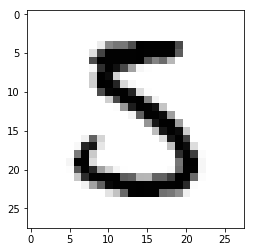

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' %(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples -1)
    print("label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()